In [1]:
import numpy as np
import os
import pandas as pd

#Accuracy measurement
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


#Visualaization
import seaborn as sns
import matplotlib.pyplot as plt


#Model Module
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
from tensorflow.keras import backend as bk

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adamax
from tensorflow.keras.models import Sequential


from tqdm import tqdm
import cv2

In [2]:
classNames = ["cats", 'dogs']
classNameslabels = {classnames: i for i, classnames in enumerate(classNames)}

In [3]:
image_shape = (128, 128)

In [4]:
def datasetLoaderFromDirectory():
    #Load datasets from folder
    dataset_path = ["dataset/training_set/", "dataset/test_set/"]
    #Store data into the list with their paths
    imageataOutput = []
    # Tag each data path file
    for i in dataset_path:
        #List for image ata
        images = []
        #list for class names
        labels = []
        print("Counting : {}".format(i))

            
        for j in os.listdir(i):
            label = classNameslabels[j]
            for imagedatafile in tqdm(os.listdir(os.path.join(i, j))):
                
                imagePath = os.path.join(os.path.join(i, j), imagedatafile)
                
                #image Read & Preprocessing
                image = cv2.imread(imagePath)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_shape)
                
                #print("Images: ", image)
                
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = "float32")
        labels = np.array(labels, dtype = 'float32')
        #print(images)
        imageataOutput.append((images, labels))
    
    return imageataOutput

Counting : dataset/training_set/


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:27<00:00, 147.10it/s]


Counting : dataset/test_set/


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 161.90it/s]


In [6]:
train_images, train_labels = shuffle(train_image, train_labels, random_state = 26)

In [7]:
_,trainImageLabelInfo = np.unique(train_labels , return_counts=True)
_,testImageLabelInfo = np.unique(test_labels , return_counts=True )

In [8]:
print('Train image label information for 0 class ', trainImageLabelInfo[0])
print('Train image label information for 1 class ', trainImageLabelInfo[1])

print('-----------------------------------------------------------------------')


print('Test image label information for 0 class ', testImageLabelInfo[0])
print('Test image label information for 1 class ', testImageLabelInfo[1])

Train image label information for 0 class  4000
Train image label information for 1 class  4000
-----------------------------------------------------------------------
Test image label information for 0 class  1000
Test image label information for 1 class  1000


In [9]:
# Scaling image featues 
train_images = train_images/255.0
test_image = test_image/255.0

In [10]:
model = Sequential()


#Input Layer
model.add(Conv2D(filters = 32, kernel_size = (11, 11), padding = "same", activation = "relu", input_shape = (180,180, 3)))
model.add(Conv2D(filters = 32, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2), strides = (3, 3)))

# #(224/2, 224/2) -- > (112, 112)
 #100

#2nd Layer
model.add(Conv2D(filters = 64, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (3, 3)))

# 100 + 40
#3rd Layer
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (3, 3)))


#5th Layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (3, 3)))


#6th layer
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (11, 11), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (3, 3)))


model.add(Flatten())


#Output Layer
model.add(Dense(2028, activation = "relu")) 
model.add(Dense(2048, activation = "relu"))
model.add(Dense(2, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      11648     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      123936    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        247872    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        495680    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 128)       9

In [12]:
model.compile(optimizer = 'adam',
             loss = "sparse_categorical_crossentropy",#since label is integer
             metrics = ['accuracy'])

In [13]:
modelData = model.fit(train_images,
                     train_labels,
                      epochs = 5,
                     batch_size = 32,
                     validation_split=0.2)

Epoch 1/5
200/200 [==============================] - 3592s 18s/step - loss: 0.6935 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.4963
Epoch 2/5
200/200 [==============================] - 6409s 32s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 3/5
200/200 [==============================] - 3298s 17s/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 4/5
200/200 [==============================] - 2999s 15s/step - loss: 0.6933 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 5/5
200/200 [==============================] - 4146s 21s/step - loss: 0.6933 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4963


In [14]:
def accuracy_and_loss_plot(modelData):
    fig = plt.figure(figsize=(10,10))
    
    plt.subplot(221)
    plt.plot(modelData.history['accuracy'],'bo--', label ='accuracy')
    plt.plot(modelData.history['val_accuracy'], 'ro--', label ='val_accuracy')
    plt.title('Training Data accuracy measurement')
    plt.xlabel('Number of Epoch')
    plt.ylabel('Accuracy Measurement')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    plt.subplot(222)
    plt.plot(modelData.history['loss'],'bo--', label = 'loss')
    plt.plot(modelData.history['val_loss'], 'ro--', label = 'val_loss')
    plt.title('Training Data Accuracy Information')
    plt.xlabel('Number of Epoch')
    plt.ylabel('Accuracy Measurement')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    
    
    plt.show()

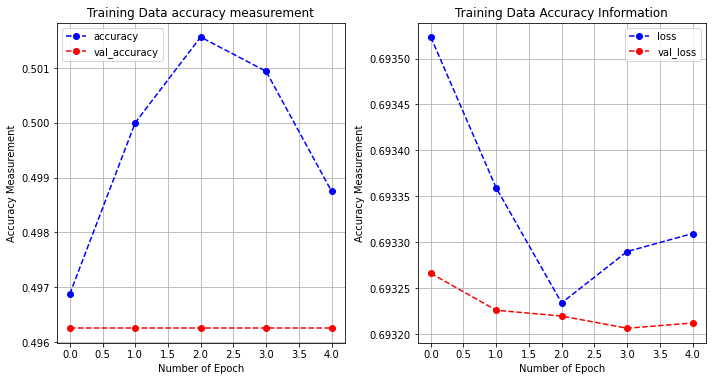

In [15]:
accuracy_and_loss_plot(modelData)